In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt

import qcodes as qc
from personal.tools import fit_toolbox
loc_provider = qc.data.location.FormatLocation(fmt='data/{date}/#{counter}_{name}_{time}')
qc.data.data_set.DataSet.location_provider=loc_provider
%matplotlib notebook

base_dir = os.path.abspath(os.getcwd()+'\..\..')
print(base_dir)

<IPython.core.display.Javascript object>

C:\Users\lab.BluG12Meas\Documents\Qcodes\personal


# Measurement set 3

For the last T1 measurement, the tuning was not good. Therefore, this has been redone, and a new T1 has been started.

<IPython.core.display.Javascript object>


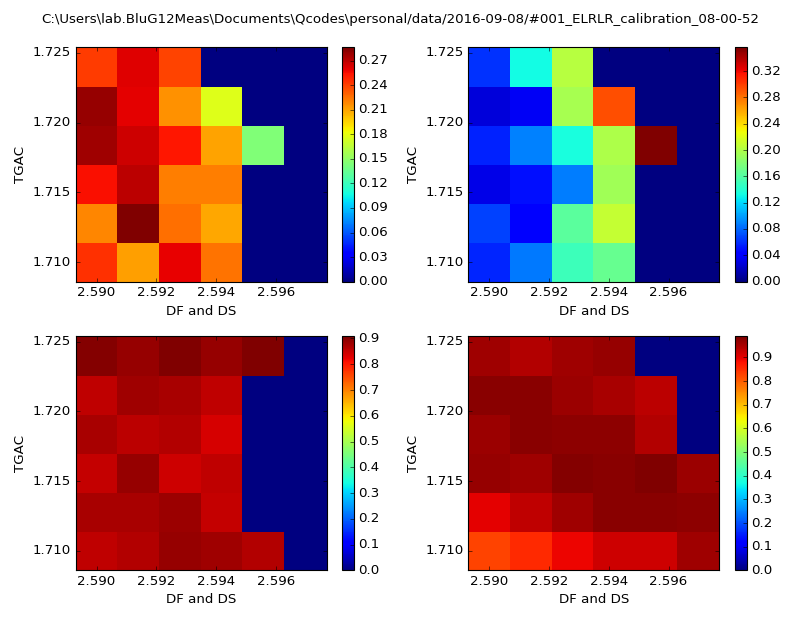

In [2]:
data = qc.load_data(base_dir+'/data/2016-09-08/#001_ELRLR_calibration_08-00-52')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


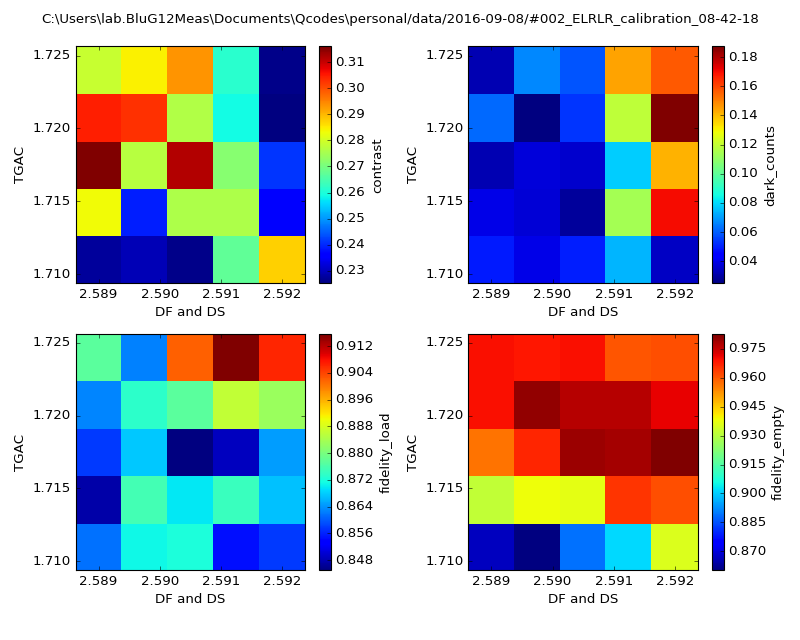

In [9]:
data = qc.load_data(base_dir+'/data/2016-09-08/#002_ELRLR_calibration_08-42-18')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Operating point:

DF_DS(2.589)
TGAC(1.717)

Number of successful sweeps: 13


<IPython.core.display.Javascript object>


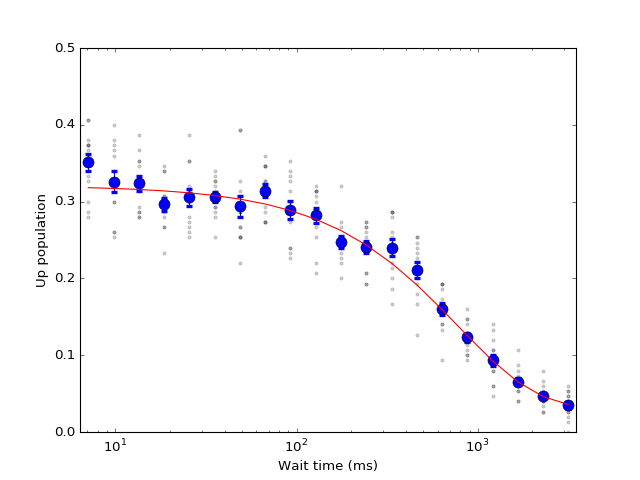

T1 time: 781 ms
[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 20
    # variables        = 3
    chi-square         = 344483.434
    reduced chi-square = 20263.731
    Akaike info crit   = 201.081
    Bayesian info crit = 204.069
[[Variables]]
    tau:         781.446191 +/- 35.43763 (4.53%) (init= 865.4355)
    offset:      0.03067881 +/- 0.002970 (9.68%) (init= 0.03487179)
    amplitude:   0.29006773 +/- 0.004220 (1.46%) (init= 0.3261538)
[[Correlations]] (unreported correlations are <  0.100)
    C(tau, offset)               = -0.817 
    C(offset, amplitude)         = -0.440 
    C(tau, amplitude)            =  0.105 



In [27]:
data = qc.load_data(base_dir + '/data/2016-09-08/#003_T1_data_09-57-29')
T1_wait_times = data.T1_wait_time_set[0]
T1_wait_times_sorted = np.sort(T1_wait_times)
idx_sorted = np.argsort(T1_wait_times)

max_idx = np.argmin([~np.isnan(np.sum(datarow)) for datarow in data.up_proportion])
print('Number of successful sweeps: {}'.format(max_idx))
vals = data.up_proportion[:max_idx]
vals_sorted = vals[:,idx_sorted]
vals_mean_sorted = np.mean(vals_sorted,axis=0)
vals_std_sorted = np.std(vals_sorted,axis=0)
vals_std_mean_sorted = vals_std_sorted/np.sqrt(max_idx)


fig = plt.figure()
ax = fig.gca()
for datarow in vals_sorted:
    ax.plot(T1_wait_times_sorted, datarow, 'ok', ms=3, alpha=0.2)
(_, caps, _) = ax.errorbar(T1_wait_times_sorted, vals_mean_sorted, yerr=vals_std_mean_sorted, 
                           marker='o', linestyle='',ms=10)
for cap in caps:
    cap.set_markeredgewidth(3)
    
# Fitting 
mod = fit_toolbox.ExponentialFit()
result=mod.perform_fit(T1_wait_times_sorted,vals_mean_sorted, weights=1/np.power(vals_std_mean_sorted,2))
print('T1 time: {:.0f} ms'.format(result.best_values['tau']))
plt.plot(T1_wait_times_sorted, result.best_fit, 'r-')

ax.set_xscale("log")
ax.set_xlim([0.9*T1_wait_times_sorted[0], 1.1*T1_wait_times_sorted[-1]])
ax.set_ylim([0, 0.5])

ax.set_xlabel('Wait time (ms)')
ax.set_ylabel('Up population')
print(result.fit_report())

Readout

In [ ]:
data = qc.load_data(base_dir+'/data/2016-09-08/#007_variable_read_19-09-52'')

plot = qc.MatPlot()
plot.add(data.Channel_A_signal, decimation=[100,1])

Calibration measurements stored in

# Measurement set 2

<IPython.core.display.Javascript object>


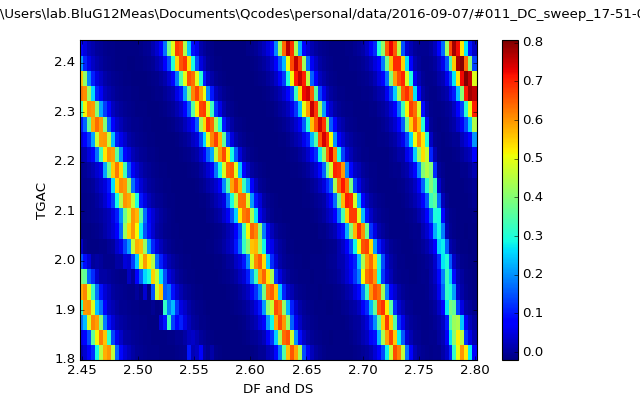

In [3]:
data = qc.load_data(base_dir + '/data/2016-09-07/#011_DC_sweep_17-51-07')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

The donor seems to be back where it belongs

<IPython.core.display.Javascript object>


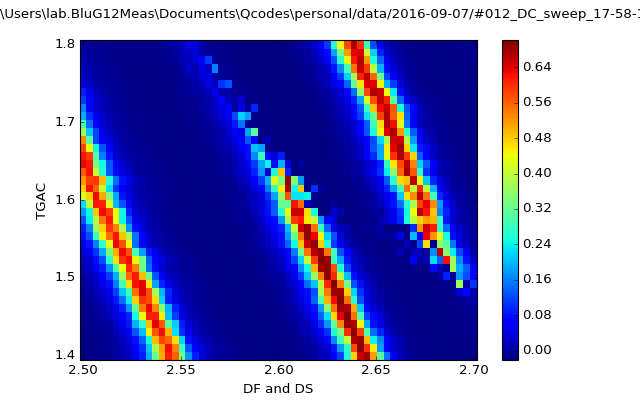

In [3]:
data = qc.load_data(base_dir + '/data/2016-09-07/#012_DC_sweep_17-58-15')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

<IPython.core.display.Javascript object>


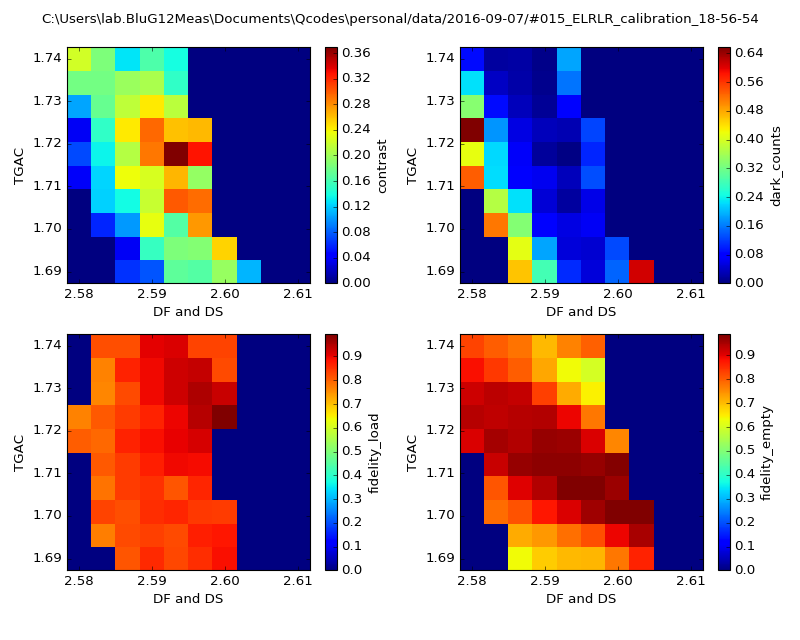

In [3]:
data = qc.load_data(base_dir+'/data/2016-09-07/#015_ELRLR_calibration_18-56-54')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


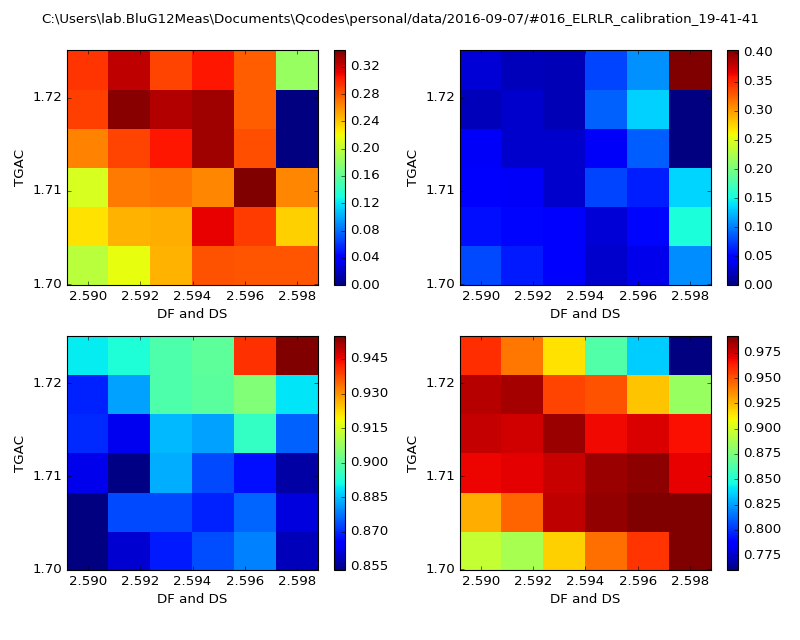

In [5]:
data = qc.load_data(base_dir+'/data/2016-09-07/#016_ELRLR_calibration_19-41-41')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


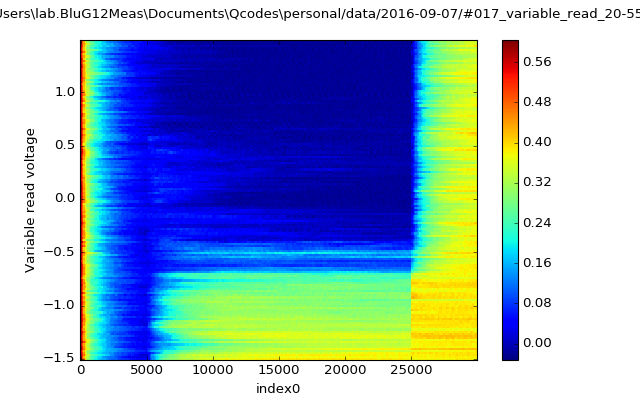

In [6]:
data = qc.load_data(base_dir+'/data/2016-09-07/#017_variable_read_20-55-00')

plot = qc.MatPlot()
plot.add(data.Channel_A_signal, decimation=[100,1])

## T1 

Number of successful sweeps: 20


<IPython.core.display.Javascript object>


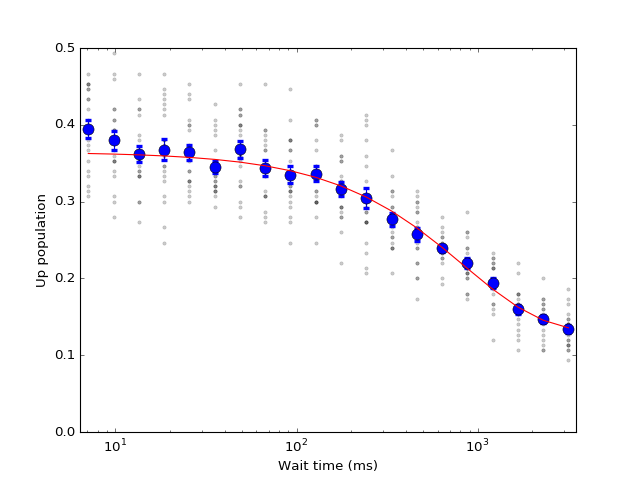

T1 time: 841 ms
[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 32
    # data points      = 20
    # variables        = 3
    chi-square         = 242986.929
    reduced chi-square = 14293.349
    Akaike info crit   = 194.101
    Bayesian info crit = 197.088
[[Variables]]
    amplitude:   0.23440578 +/- 0.004540 (1.94%) (init= 0.38)
    offset:      0.13018320 +/- 0.003296 (2.53%) (init= 0.134)
    tau:         840.767596 +/- 39.29436 (4.67%) (init= 2283.889)
[[Correlations]] (unreported correlations are <  0.100)
    C(offset, tau)               = -0.786 
    C(amplitude, offset)         = -0.436 



In [4]:
data = qc.load_data(base_dir + '/data/2016-09-07/#020_T1_data_21-41-57')
T1_wait_times = data.T1_wait_time_set[0]
T1_wait_times_sorted = np.sort(T1_wait_times)
idx_sorted = np.argsort(T1_wait_times)

max_idx = np.argmin([~np.isnan(np.sum(datarow)) for datarow in data.up_proportion])
print('Number of successful sweeps: {}'.format(max_idx))
vals = data.up_proportion[:max_idx]
vals_sorted = vals[:,idx_sorted]
vals_mean_sorted = np.mean(vals_sorted,axis=0)
vals_std_sorted = np.std(vals_sorted,axis=0)
vals_std_mean_sorted = vals_std_sorted/np.sqrt(max_idx)


fig = plt.figure()
ax = fig.gca()
for datarow in vals_sorted:
    ax.plot(T1_wait_times_sorted, datarow, 'ok', ms=3, alpha=0.2)
(_, caps, _) = ax.errorbar(T1_wait_times_sorted, vals_mean_sorted, yerr=vals_std_mean_sorted, 
                           marker='o', linestyle='',ms=10)
for cap in caps:
    cap.set_markeredgewidth(3)
    
# Fitting 
mod = fit_toolbox.ExponentialFit()
result=mod.perform_fit(T1_wait_times_sorted,vals_mean_sorted, weights=1/np.power(vals_std_mean_sorted,2))
print('T1 time: {:.0f} ms'.format(result.best_values['tau']))
print(result.fit_report())
plt.plot(T1_wait_times_sorted, result.best_fit, 'r-')

ax.set_xscale("log")
ax.set_xlim([0.9*T1_wait_times_sorted[0], 1.1*T1_wait_times_sorted[-1]])
ax.set_ylim([0, 0.5])

ax.set_xlabel('Wait time (ms)')
ax.set_ylabel('Up population')

The contrast is quite bad, likely the tuning did not go well. Will redo for measurement set 3

## Read level scan

<IPython.core.display.Javascript object>


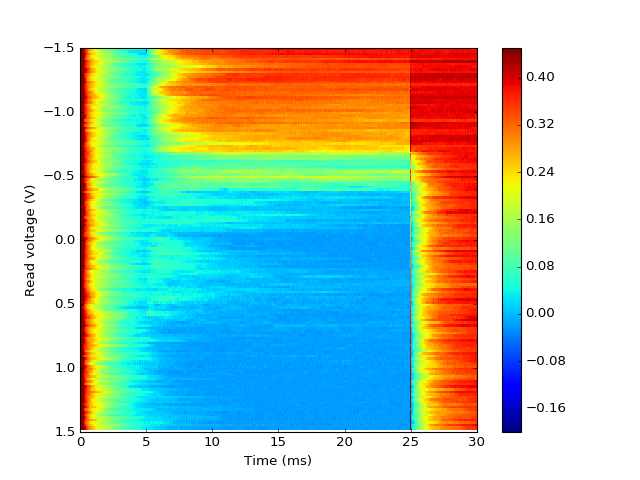

In [2]:
data = qc.load_data(base_dir+'/data/2016-09-07/#017_variable_read_20-55-00')

decimation = 20
fig = plt.figure()
plt.pcolormesh(data.index0[0,::decimation]/1e3,
               data.variable_read_voltage_set,
               data.Channel_A_signal[:,::decimation])
plt.ylim(plt.ylim()[::-1])
plt.colorbar()
plt.clim([-0.2,0.45])
plt.xlabel('Time (ms)')
plt.ylabel('Read voltage (V)')

# Measurement set 1

## DC scan for empty voltage level

<IPython.core.display.Javascript object>


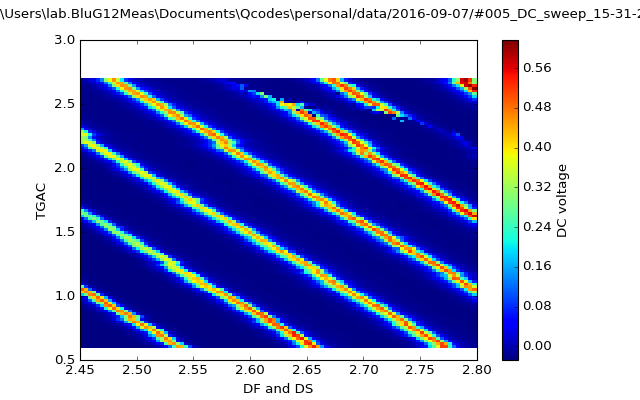

In [7]:
data = qc.load_data(base_dir + '/data/2016-09-07/#005_DC_sweep_15-31-23')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

<IPython.core.display.Javascript object>


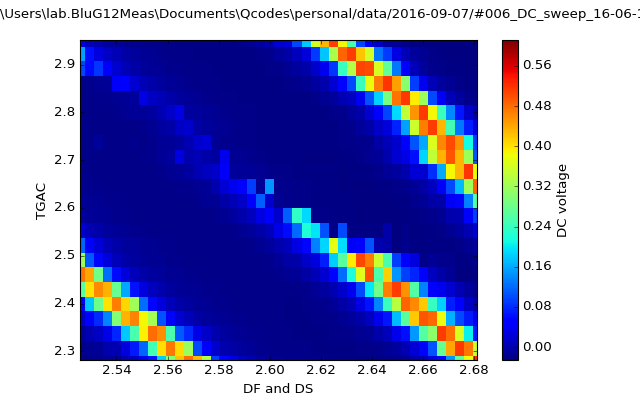

In [8]:
data = qc.load_data(base_dir + '/data/2016-09-07/#006_DC_sweep_16-06-16')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

At this point DF got stuck again. We decided to reset the DF, which marks the start of measurement set 2. Note that we also found that DF was actually still shorted from the previous measurement set, and so these results only show TGAC vs DS